# SVM을 통한 Lasso feature selection
## <span style="color:yellow">Support vector machine</span> <br>
이진분류 선형모델<br>
margin! 가장 가까운 두 데이터(support vector라고 부름) 사이 class 구분 선<br>
margin이 클수록 강건성이 높고 outier 영향력 최소<br>
<br>
핵심 파라미터 3개 존재 : c gamma kernel<br>

### c 클 때<br>
training point 정확하게 구분<br>
분류 정확성 높음<br>
but overfitting 될 가능성 높기때문에 새로운 데이터 적용시 어려움 존재 -> 강건성 낮음<br>
margin support vector와 가까움 굴곡의 형태띔 <br>

### c 작을 때<br>
오류 존재 가능성이 있지만 새로운 데이터로 테스트 했을 때 강건성 높음<br>
margin이 support vector과 거리 멈 margin 최대화<br>





### <top 20>

자기자본구성비율	0.002640<br>
매출원가 대 매출액비율	0.001965<br>
비유동자산구성비율	0.001729<br>
유동자산구성비율	0.001474<br>
자기자본경상이익률 (2007년 이전 발생)	0.000370<br>
금융비용	0.000314<br>
타인자본구성비율	0.000313<br>
노동소득분배율	0.000281<br>
자본분배율	0.000256<br>
이자수익(요약)	0.000233<br>
복리후생비(요약)	0.000228<br>
종업원수	0.000226<br>
이자비용(요약)	0.000224<br>
차량운반구	0.000210<br>
퇴직급여(요약)	0.000173<br>
자기자본배율	0.000166<br>
급료	0.000165<br>
감가상각비	0.000152<br>
비유동부채 대 순운전자본비율	0.000151<br>
종업원1인당 인건비증가율	0.000150<br>

In [116]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from tqdm import tqdm
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'malgun gothic'
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix

In [2]:
train = pd.read_csv(r'..\..\Code\SH\재무변수_부도사유_ver2SH.csv',index_col=0)

In [268]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27357 entries, 0 to 27356
Columns: 271 entries, 회사명 to 부도
dtypes: float64(265), int64(1), object(5)
memory usage: 57.8+ MB


In [3]:
train

,회사명,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자산총계(요약),유동자산(요약),당좌자산(요약),현금 및 현금성자산(요약),...,기업가치(EV),EBITDA,EBITDA/매출액,EBITDA/금융비용,EBITDA/평균발행주식수,EV/EBITDA,년,key,공시제목,부도
0,(주)CMG제약,58820.0,2000/12,5.0,NaN,UQ,28990.0,21169.0,10541.0,4330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2001.0,588202001,NaN,1.0
1,(주)CMG제약,58820.0,2001/12,5.0,NaN,UQ,20908.0,16359.0,2307.0,1829.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2002.0,588202002,NaN,1.0
2,(주)CMG제약,58820.0,2002/12,5.0,NaN,UQ,15401.0,9880.0,1436.0,355.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,588202003,NaN,1.0
3,(주)CMG제약,58820.0,2003/12,5.0,NaN,UQ,11063.0,8534.0,1083.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2004.0,588202004,NaN,1.0
4,(주)CMG제약,58820.0,2004/12,5.0,NaN,UQ,5179.0,3893.0,445.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,588202005,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27352,흥구석유(주),24060.0,2016/12,5.0,NaN,UQ,79137.0,14794.0,12274.0,1440.0,...,55934.79,1348.52,0.94,10.71,89.90,41.48,2017.0,240602017,NaN,1.0
27353,흥구석유(주),24060.0,2017/12,5.0,NaN,UQ,79912.0,15880.0,13124.0,1588.0,...,46036.63,1147.56,0.74,9.02,76.50,40.12,2018.0,240602018,NaN,1.0
27354,흥구석유(주),24060.0,2018/12,5.0,NaN,UQ,75206.0,12515.0,11029.0,4017.0,...,36557.57,1451.79,0.87,16.83,96.79,25.18,2019.0,240602019,NaN,1.0
27355,흥구석유(주),24060.0,2019/12,5.0,NaN,UQ,83661.0,22620.0,19701.0,2318.0,...,78081.78,1009.25,0.67,507.93,67.28,77.37,2020.0,240602020,NaN,1.0


In [4]:
col = train.columns[6:267].values.tolist()
col.append('부도')

In [5]:
df = train[col]

In [6]:
df

,자산총계(요약),유동자산(요약),당좌자산(요약),현금 및 현금성자산(요약),단기투자자산(요약),단기예금(요약),단기매매증권(요약),단기대여금(요약),기타단기투자자산(요약),매출채권(요약),...,PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV),EBITDA,EBITDA/매출액,EBITDA/금융비용,EBITDA/평균발행주식수,EV/EBITDA,부도
0,28990.0,21169.0,10541.0,4330.0,4552.0,4539.0,1.0,13.0,0.0,786.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,20908.0,16359.0,2307.0,1829.0,18.0,0.0,6.0,13.0,0.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,15401.0,9880.0,1436.0,355.0,246.0,240.0,6.0,0.0,0.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,11063.0,8534.0,1083.0,2.0,381.0,380.0,0.0,0.0,1.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,5179.0,3893.0,445.0,11.0,0.0,0.0,0.0,0.0,0.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27352,79137.0,14794.0,12274.0,1440.0,5065.0,0.0,0.0,0.0,5065.0,5158.0,...,35.62,0.43,0.28,55934.79,1348.52,0.94,10.71,89.90,41.48,1.0
27353,79912.0,15880.0,13124.0,1588.0,5058.0,0.0,0.0,0.0,5058.0,6315.0,...,24.31,0.34,0.24,46036.63,1147.56,0.74,9.02,76.50,40.12,1.0
27354,75206.0,12515.0,11029.0,4017.0,5.0,0.0,0.0,0.0,5.0,4403.0,...,7.82,0.40,0.24,36557.57,1451.79,0.87,16.83,96.79,25.18,1.0
27355,83661.0,22620.0,19701.0,2318.0,11472.0,0.0,0.0,0.0,11472.0,5161.0,...,51.31,0.86,0.25,78081.78,1009.25,0.67,507.93,67.28,77.37,1.0


In [7]:
df = df.fillna(0)
df

,자산총계(요약),유동자산(요약),당좌자산(요약),현금 및 현금성자산(요약),단기투자자산(요약),단기예금(요약),단기매매증권(요약),단기대여금(요약),기타단기투자자산(요약),매출채권(요약),...,PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV),EBITDA,EBITDA/매출액,EBITDA/금융비용,EBITDA/평균발행주식수,EV/EBITDA,부도
0,28990.0,21169.0,10541.0,4330.0,4552.0,4539.0,1.0,13.0,0.0,786.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
1,20908.0,16359.0,2307.0,1829.0,18.0,0.0,6.0,13.0,0.0,14.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
2,15401.0,9880.0,1436.0,355.0,246.0,240.0,6.0,0.0,0.0,26.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
3,11063.0,8534.0,1083.0,2.0,381.0,380.0,0.0,0.0,1.0,72.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
4,5179.0,3893.0,445.0,11.0,0.0,0.0,0.0,0.0,0.0,33.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27352,79137.0,14794.0,12274.0,1440.0,5065.0,0.0,0.0,0.0,5065.0,5158.0,...,35.62,0.43,0.28,55934.79,1348.52,0.94,10.71,89.90,41.48,1.0
27353,79912.0,15880.0,13124.0,1588.0,5058.0,0.0,0.0,0.0,5058.0,6315.0,...,24.31,0.34,0.24,46036.63,1147.56,0.74,9.02,76.50,40.12,1.0
27354,75206.0,12515.0,11029.0,4017.0,5.0,0.0,0.0,0.0,5.0,4403.0,...,7.82,0.40,0.24,36557.57,1451.79,0.87,16.83,96.79,25.18,1.0
27355,83661.0,22620.0,19701.0,2318.0,11472.0,0.0,0.0,0.0,11472.0,5161.0,...,51.31,0.86,0.25,78081.78,1009.25,0.67,507.93,67.28,77.37,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27357 entries, 0 to 27356
Columns: 262 entries, 자산총계(요약) to 부도
dtypes: float64(262)
memory usage: 54.9 MB


In [9]:
X = df.drop('부도', axis=1)
y = df['부도']

In [14]:
print(X.shape)
print(y.shape)

(27357, 261)
(27357,)


## SVM C=1<br>
### top26
유동자산회전률                       0.090482<br>
총자본회전률                        0.053176<br>
경영자본회전률                       0.041269<br>
조세공과 대 총비용비율                  0.040386<br>
유보액 대 납입자본배율                  0.020309<br>
당좌자산회전률                       0.019191<br>
타인자본회전률                       0.016483<br>
기업경상이익률 (2007년 이전 발생)         0.013555<br>
감가상각비 대 총비용비율                 0.011825<br>
사내유보율                          0.01174<br>
총자본경상이익률 (2007년 이전 발생)        0.011559<br>
총자본영업이익률                      0.011548<br>
총자본사업이익률                      0.010272<br>
자기자본배당률                        0.00725<br>
자기자본회전률                       0.006369<br>
비유동자산회전률                      0.006015<br>
금융비용 대 총비용비율                  0.005643<br>
PSR(Price sales ratio)(최저)    0.005576<br>
순운전자본회전률                      0.005241<br>
재고자산 대 유동자산비율                  0.00524<br>
유동자산구성비율                      0.005238<br>
자기자본구성비율                      0.004638<br>
당좌자산구성비율                      0.004071<br>
비유동자산구성비율                     0.003604<br>
인건비 대 총비용비율                   0.002761<br>
광고선전비 대 매출액비율                 0.002519<br>

In [33]:
lsvc = LinearSVC(C=1, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=False, max_features=26)
model.fit(X,y)
X_new = model.transform(X)
print(X_new.shape)
print(model.get_feature_names_out())
print("훈련 세트 정확도: {:.3f}".format(lsvc.score(X, y)))
print("f1_score: {:.3f}".format(f1_score(y, lsvc.predict(X), average='macro')))
print("roc_auc_score: {:.3f}".format(roc_auc_score(y, lsvc.predict(X))))

(27357, 26)
['총자본사업이익률' '총자본영업이익률' '총자본경상이익률 (2007년 이전 발생)' '기업경상이익률 (2007년 이전 발생)'
 '광고선전비 대 매출액비율' '인건비 대 총비용비율' '조세공과 대 총비용비율' '금융비용 대 총비용비율'
 '감가상각비 대 총비용비율' '사내유보율' '자기자본배당률' '유동자산구성비율' '재고자산 대 유동자산비율' '당좌자산구성비율'
 '비유동자산구성비율' '자기자본구성비율' '유보액 대 납입자본배율' '총자본회전률' '경영자본회전률' '자기자본회전률'
 '타인자본회전률' '유동자산회전률' '당좌자산회전률' '비유동자산회전률' '순운전자본회전률'
 'PSR(Price sales ratio)(최저)']
훈련 세트 정확도: 0.985
f1_score: 0.610
roc_auc_score: 0.566


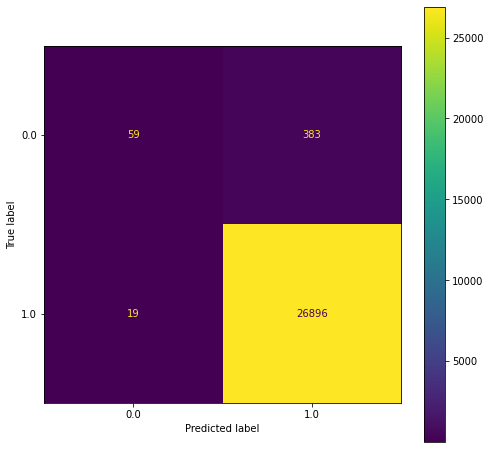

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix
plt.rcParams['figure.figsize'] = (8,8)
plot_confusion_matrix(lsvc, X, y)
plt.show()

In [18]:
np.unique(lsvc.predict(X), return_counts= True)

(array([0., 1.]), array([   79, 27278], dtype=int64))

In [39]:
#transform 결과데이터
print(X_new.shape)
print(X_new)

(27357, 26)
[[  0.     0.     0.   ...   0.     0.     0.  ]
 [  1.63   1.41   0.53 ...   3.48   0.57   0.  ]
 [-20.86 -21.03   0.   ...   5.24   1.14   0.  ]
 ...
 [  1.54   1.41   0.   ...   2.62   8.08   0.24]
 [  0.87   0.63   0.   ...   2.44   6.91   0.25]
 [ -0.44  -0.59   0.   ...   1.96   4.     0.4 ]]


In [49]:
#상관계수
print(model.estimator_.coef_.shape)
model.estimator_.coef_[0]

(1, 261)


array([-8.46714326e-07,  1.14482140e-08, -5.73555271e-06,  4.41296219e-06,
        1.66477078e-05, -5.94940708e-06, -8.98464430e-06, -1.90437550e-05,
       -8.90087155e-06,  1.14378274e-06,  3.96452653e-06,  4.43601760e-07,
        5.15689673e-06,  5.03948405e-07, -8.50937957e-06,  5.52249831e-05,
        1.47137935e-05, -1.29612414e-05, -1.22836482e-05,  0.00000000e+00,
       -4.08793127e-07, -2.69903992e-06,  4.69263424e-05,  2.85051141e-06,
       -2.66012569e-06,  9.03624154e-06, -5.40957630e-06, -8.42016267e-06,
        3.13735030e-06,  1.07656497e-06,  4.61525190e-06, -6.83115706e-06,
        3.54935866e-06,  8.25750792e-06,  0.00000000e+00, -7.18124651e-08,
        1.90891543e-06, -1.93817635e-06, -2.67753403e-06, -4.46296641e-06,
       -1.86209172e-06,  8.85162463e-07,  5.70938732e-06,  2.20541735e-06,
        2.47645526e-05,  6.53599319e-06,  0.00000000e+00,  8.24911373e-07,
        7.40390898e-07,  1.74220719e-06,  5.32132254e-06, -3.68943906e-06,
        1.98058061e-06,  

<AxesSubplot:>

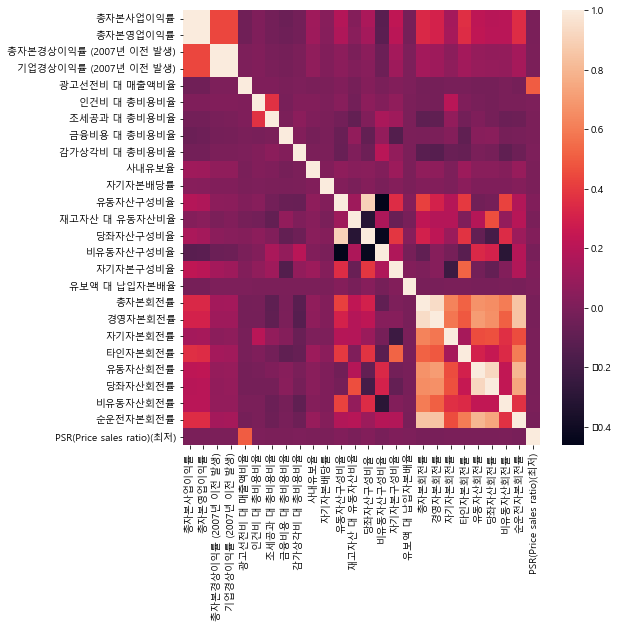

In [48]:
sns.heatmap(df[model.get_feature_names_out().tolist()].corr())

In [52]:
model.estimator_.coef_[0]

array([-8.46714326e-07,  1.14482140e-08, -5.73555271e-06,  4.41296219e-06,
        1.66477078e-05, -5.94940708e-06, -8.98464430e-06, -1.90437550e-05,
       -8.90087155e-06,  1.14378274e-06,  3.96452653e-06,  4.43601760e-07,
        5.15689673e-06,  5.03948405e-07, -8.50937957e-06,  5.52249831e-05,
        1.47137935e-05, -1.29612414e-05, -1.22836482e-05,  0.00000000e+00,
       -4.08793127e-07, -2.69903992e-06,  4.69263424e-05,  2.85051141e-06,
       -2.66012569e-06,  9.03624154e-06, -5.40957630e-06, -8.42016267e-06,
        3.13735030e-06,  1.07656497e-06,  4.61525190e-06, -6.83115706e-06,
        3.54935866e-06,  8.25750792e-06,  0.00000000e+00, -7.18124651e-08,
        1.90891543e-06, -1.93817635e-06, -2.67753403e-06, -4.46296641e-06,
       -1.86209172e-06,  8.85162463e-07,  5.70938732e-06,  2.20541735e-06,
        2.47645526e-05,  6.53599319e-06,  0.00000000e+00,  8.24911373e-07,
        7.40390898e-07,  1.74220719e-06,  5.32132254e-06, -3.68943906e-06,
        1.98058061e-06,  

In [56]:
df.columns

Index(['자산총계(요약)', '유동자산(요약)', '당좌자산(요약)', '현금 및 현금성자산(요약)', '단기투자자산(요약)',
       '단기예금(요약)', '단기매매증권(요약)', '단기대여금(요약)', '기타단기투자자산(요약)', '매출채권(요약)',
       ...
       'PCR(Price cash-flow ratio)(최저)', 'PSR(Price sales ratio)(최고)',
       'PSR(Price sales ratio)(최저)', '기업가치(EV)', 'EBITDA', 'EBITDA/매출액',
       'EBITDA/금융비용', 'EBITDA/평균발행주식수', 'EV/EBITDA', '부도'],
      dtype='object', length=262)

In [270]:
pd.DataFrame([df.columns[:-1], model.estimator_.coef_[0]])

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
0,자산총계(요약),유동자산(요약),당좌자산(요약),현금 및 현금성자산(요약),단기투자자산(요약),단기예금(요약),단기매매증권(요약),단기대여금(요약),기타단기투자자산(요약),매출채권(요약),...,PCR(Price cash-flow ratio)(최고),PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV),EBITDA,EBITDA/매출액,EBITDA/금융비용,EBITDA/평균발행주식수,EV/EBITDA
1,0.000004,-0.000008,0.000003,0.000017,0.000007,-0.000011,0.000049,-0.000042,0.000013,-0.000005,...,-0.000043,0.000069,-0.000066,0.00003,0.000001,0.00001,0.000242,0.000039,0.000008,-0.000014


In [81]:
df_coef = pd.DataFrame([df.columns[:-1], model.estimator_.coef_[0]])

In [82]:
df_coef = df_coef.rename(columns = df_coef.iloc[0])

In [83]:
df_coef = df_coef.drop(df_coef.index[0])


In [102]:
df_coef_new = abs(df_coef[model.get_feature_names_out().tolist()]).T
print(df_coef_new)

                                   1
총자본사업이익률                    0.010272
총자본영업이익률                    0.011548
총자본경상이익률 (2007년 이전 발생)      0.011559
기업경상이익률 (2007년 이전 발생)       0.013555
광고선전비 대 매출액비율               0.002519
인건비 대 총비용비율                 0.002761
조세공과 대 총비용비율                0.040386
금융비용 대 총비용비율                0.005643
감가상각비 대 총비용비율               0.011825
사내유보율                        0.01174
자기자본배당률                      0.00725
유동자산구성비율                    0.005238
재고자산 대 유동자산비율                0.00524
당좌자산구성비율                    0.004071
비유동자산구성비율                   0.003604
자기자본구성비율                    0.004638
유보액 대 납입자본배율                0.020309
총자본회전률                      0.053176
경영자본회전률                     0.041269
자기자본회전률                     0.006369
타인자본회전률                     0.016483
유동자산회전률                     0.090482
당좌자산회전률                     0.019191
비유동자산회전률                    0.006015
순운전자본회전률                    0.005241
PSR(Price sales ratio)(최저)  0.005576


In [105]:
df_coef_new[1].sort_values(ascending=False)

유동자산회전률                       0.090482
총자본회전률                        0.053176
경영자본회전률                       0.041269
조세공과 대 총비용비율                  0.040386
유보액 대 납입자본배율                  0.020309
당좌자산회전률                       0.019191
타인자본회전률                       0.016483
기업경상이익률 (2007년 이전 발생)         0.013555
감가상각비 대 총비용비율                 0.011825
사내유보율                          0.01174
총자본경상이익률 (2007년 이전 발생)        0.011559
총자본영업이익률                      0.011548
총자본사업이익률                      0.010272
자기자본배당률                        0.00725
자기자본회전률                       0.006369
비유동자산회전률                      0.006015
금융비용 대 총비용비율                  0.005643
PSR(Price sales ratio)(최저)    0.005576
순운전자본회전률                      0.005241
재고자산 대 유동자산비율                  0.00524
유동자산구성비율                      0.005238
자기자본구성비율                      0.004638
당좌자산구성비율                      0.004071
비유동자산구성비율                     0.003604
인건비 대 총비용비율                   0.002761
광고선전비 대 매출액비율            

<AxesSubplot:>

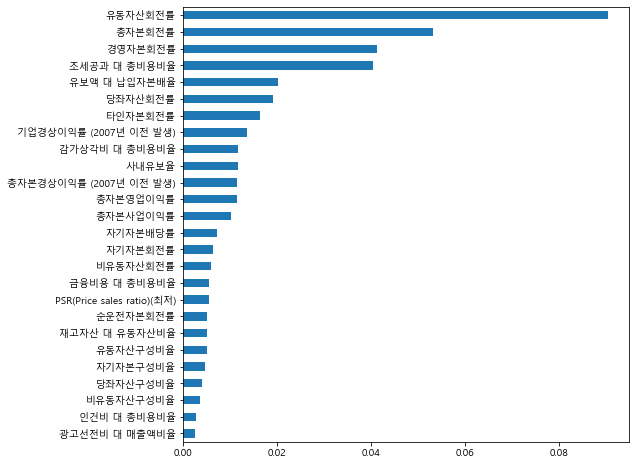

In [114]:
df_coef_new[1].sort_values(ascending=True).plot(kind='barh')

## SVM C=0.1
### top26

유동자산회전률                       0.058224<br>
조세공과 대 총비용비율                  0.034758<br>
경영자본회전률                       0.028083<br>
타인자본회전률                       0.019375<br>
기업경상이익률 (2007년 이전 발생)         0.012832<br>
감가상각비 대 총비용비율                 0.012216<br>
당좌자산회전률                       0.011697<br>
총자본경상이익률 (2007년 이전 발생)        0.010852<br>
사내유보율                         0.010747<br>
총자본회전률                        0.009211<br>
총자본영업이익률                      0.007598<br>
총자본사업이익률                      0.006421<br>
유동자산구성비율                       0.00601<br>
금융비용 대 총비용비율                  0.005813<br>
자기자본회전률                       0.005719<br>
PSR(Price sales ratio)(최저)    0.005159<br>
재고자산 대 유동자산비율                 0.004976<br>
자기자본구성비율                      0.004813<br>
당좌자산구성비율                      0.004508<br>
비유동자산구성비율                     0.003556<br>
인건비 대 총비용비율                   0.002737<br>
비유동자산회전률                      0.002652<br>
광고선전비 대 매출액비율                  0.00233<br>
매출액총이익률                       0.002263<br>
매출원가 대 매출액비율                  0.001631<br>
R & D 투자효율                    0.001572

In [115]:
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=False, max_features=26)
model.fit(X,y)
X_new = model.transform(X)
print(X_new.shape)
print(model.get_feature_names_out())
print("훈련 세트 정확도: {:.3f}".format(lsvc.score(X, y)))
print("f1_score: {:.3f}".format(f1_score(y, lsvc.predict(X), average='macro')))
print("roc_auc_score: {:.3f}".format(roc_auc_score(y, lsvc.predict(X))))

(27357, 26)
['매출액총이익률' '총자본사업이익률' '총자본영업이익률' '총자본경상이익률 (2007년 이전 발생)'
 '기업경상이익률 (2007년 이전 발생)' '매출원가 대 매출액비율' '광고선전비 대 매출액비율' '인건비 대 총비용비율'
 '조세공과 대 총비용비율' '금융비용 대 총비용비율' '감가상각비 대 총비용비율' '사내유보율' 'R & D 투자효율'
 '유동자산구성비율' '재고자산 대 유동자산비율' '당좌자산구성비율' '비유동자산구성비율' '자기자본구성비율' '총자본회전률'
 '경영자본회전률' '자기자본회전률' '타인자본회전률' '유동자산회전률' '당좌자산회전률' '비유동자산회전률'
 'PSR(Price sales ratio)(최저)']
훈련 세트 정확도: 0.985
f1_score: 0.610
roc_auc_score: 0.566


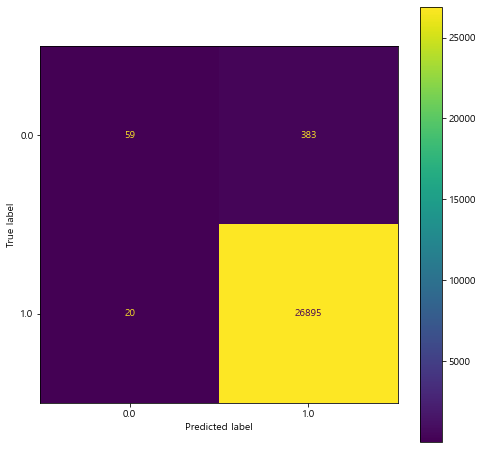

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix
plt.rcParams['figure.figsize'] = (8,8)
plot_confusion_matrix(lsvc, X, y)
plt.show()

In [130]:
df[model.get_feature_names_out().tolist()]

,매출액총이익률,총자본사업이익률,총자본영업이익률,총자본경상이익률 (2007년 이전 발생),기업경상이익률 (2007년 이전 발생),매출원가 대 매출액비율,광고선전비 대 매출액비율,인건비 대 총비용비율,조세공과 대 총비용비율,금융비용 대 총비용비율,...,비유동자산구성비율,자기자본구성비율,총자본회전률,경영자본회전률,자기자본회전률,타인자본회전률,유동자산회전률,당좌자산회전률,비유동자산회전률,PSR(Price sales ratio)(최저)
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,5.53,1.63,1.41,0.53,1.67,94.47,0.01,7.44,0.11,1.48,...,21.76,42.04,0.76,0.77,1.80,1.31,0.97,6.86,3.48,0.00
2,-10.12,-20.86,-21.03,0.00,0.00,110.12,0.02,8.36,0.09,1.15,...,35.85,42.43,1.45,1.48,3.44,2.52,2.01,14.10,5.24,0.00
3,0.70,-6.42,-6.91,1.17,2.74,99.30,0.03,5.89,0.07,1.03,...,22.86,58.15,1.31,1.33,2.68,2.58,1.89,13.81,4.32,0.00
4,-14.51,-34.93,-34.95,-38.65,-37.15,114.51,0.03,2.98,0.02,0.73,...,24.83,49.43,1.61,1.61,2.91,3.61,2.11,17.13,6.86,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27352,5.33,1.35,1.23,0.00,0.00,94.67,0.00,2.35,0.33,0.02,...,81.31,87.41,1.83,2.68,2.09,14.54,10.07,11.79,2.24,0.28
27353,5.07,0.97,0.94,0.00,0.00,94.93,0.00,2.23,0.32,0.07,...,80.13,87.29,1.96,2.91,2.24,15.46,10.14,12.25,2.42,0.24
27354,5.00,1.54,1.41,0.00,0.00,95.00,0.00,2.12,0.31,-0.01,...,83.36,93.67,2.14,3.17,2.37,22.28,11.71,13.76,2.62,0.24
27355,5.14,0.87,0.63,0.00,0.00,94.86,0.00,2.23,0.39,-0.12,...,72.96,92.04,1.90,2.76,2.04,26.38,8.58,9.81,2.44,0.25


In [ ]:
sns.heatmap(df[model.get_feature_names_out().tolist()].corr())

In [126]:
df_coef = pd.DataFrame([df.columns[:-1], model.estimator_.coef_[0]])
df_coef = df_coef.rename(columns = df_coef.iloc[0])
df_coef = df_coef.drop(df_coef.index[0])
df_coef_new = abs(df_coef[model.get_feature_names_out().tolist()]).T
print(df_coef_new)

                                   1
매출액총이익률                     0.002263
총자본사업이익률                    0.006421
총자본영업이익률                    0.007598
총자본경상이익률 (2007년 이전 발생)      0.010852
기업경상이익률 (2007년 이전 발생)       0.012832
매출원가 대 매출액비율                0.001631
광고선전비 대 매출액비율                0.00233
인건비 대 총비용비율                 0.002737
조세공과 대 총비용비율                0.034758
금융비용 대 총비용비율                0.005813
감가상각비 대 총비용비율               0.012216
사내유보율                       0.010747
R & D 투자효율                  0.001572
유동자산구성비율                     0.00601
재고자산 대 유동자산비율               0.004976
당좌자산구성비율                    0.004508
비유동자산구성비율                   0.003556
자기자본구성비율                    0.004813
총자본회전률                      0.009211
경영자본회전률                     0.028083
자기자본회전률                     0.005719
타인자본회전률                     0.019375
유동자산회전률                     0.058224
당좌자산회전률                     0.011697
비유동자산회전률                    0.002652
PSR(Price sales ratio)(최저)  0.005159


In [125]:
df_coef_new[1].sort_values(ascending=False)

유동자산회전률                       0.058224
조세공과 대 총비용비율                  0.034758
경영자본회전률                       0.028083
타인자본회전률                       0.019375
기업경상이익률 (2007년 이전 발생)         0.012832
감가상각비 대 총비용비율                 0.012216
당좌자산회전률                       0.011697
총자본경상이익률 (2007년 이전 발생)        0.010852
사내유보율                         0.010747
총자본회전률                        0.009211
총자본영업이익률                      0.007598
총자본사업이익률                      0.006421
유동자산구성비율                       0.00601
금융비용 대 총비용비율                  0.005813
자기자본회전률                       0.005719
PSR(Price sales ratio)(최저)    0.005159
재고자산 대 유동자산비율                 0.004976
자기자본구성비율                      0.004813
당좌자산구성비율                      0.004508
비유동자산구성비율                     0.003556
인건비 대 총비용비율                   0.002737
비유동자산회전률                      0.002652
광고선전비 대 매출액비율                  0.00233
매출액총이익률                       0.002263
매출원가 대 매출액비율                  0.001631
R & D 투자효율               

<AxesSubplot:>

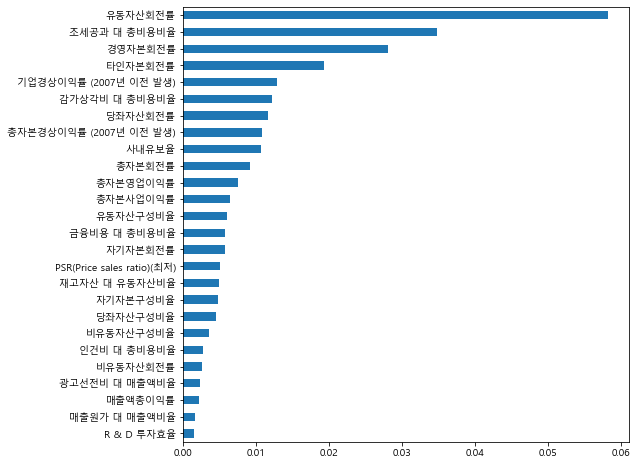

In [122]:
df_coef_new[1].sort_values(ascending=True).plot(kind='barh')

## SVM C=0.1 max_feature 설정안함

In [131]:
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=False)
model.fit(X,y)
X_new = model.transform(X)
print(X_new.shape)
print(model.get_feature_names_out())
print("훈련 세트 정확도: {:.3f}".format(lsvc.score(X, y)))
print("f1_score: {:.3f}".format(f1_score(y, lsvc.predict(X), average='macro')))
print("roc_auc_score: {:.3f}".format(roc_auc_score(y, lsvc.predict(X))))

(27357, 156)
['단기투자자산(요약)' '단기대여금(요약)' '상품(요약)' '반제품(요약)' '재공품(요약)' '*장기금융상품(요약)' '건물'
 '기타비유동자산(요약)' '제충당금(요약)' '매출총이익(요약)' '판매비와 관리비(요약)' '급료' '퇴직급여(요약)'
 '복리후생비(요약)' '세금과공과(요약)' '임차료(요약)' '감가상각비' '연구비' '기타 판매비와 관리비(요약)'
 '영업이익(요약)' '배당금수익(요약)' '외환차익(요약)' '외화환산이익(요약)' '지분법이익(요약)' '기타영업외수익(요약)'
 '이자비용(요약)' '외환차손(요약)' '외화환산손실(요약)' '지분법손실(요약)' '중단사업이익(요약)' '주당순이익(요약)'
 '희석화주당계속사업이익(요약)' '희석화주당순이익(요약)' '*주당경상이익(2007년 이전 발생)(요약)'
 '*희석화주당경상이익(2007년 이전 발생)(요약)' '총자본증가율' '유동자산증가율' '영업이익증가율'
 '경상이익증가율 (2007년 이전 발생)' '자기자본증가율' '매출액증가율' '종업원수증가율' '비유동자산증가율'
 '종업원1인당 매출액증가율' '종업원1인당 인건비증가율' '매출액총이익률' '매출액영업이익률'
 '매출액경상이익률 (2007년 이전 발생)' '매출액순이익률' '총자본사업이익률' '총자본영업이익률'
 '총자본경상이익률 (2007년 이전 발생)' '총자본순이익률' '자기자본영업이익률' '자기자본경상이익률 (2007년 이전 발생)'
 '자기자본순이익률' '자본금영업이익률' '자본금경상이익률 (2007년 이전 발생)' '자본금순이익률'
 '기업경상이익률 (2007년 이전 발생)' '투자수익률 (2007년 이전 발생)' '기업순이익률' '경영자본영업이익률'
 '경영자본순이익률' '매출원가 대 매출액비율' '영업비율' '영업외손익률' '금융비용부담률' '외환이익 대 매출액비율'
 '광고선전비 대 매출액비율' '인건비 대 총비용비율' '조세공과 대 총비용비율' '금융비용 대 총비용비율'
 '감

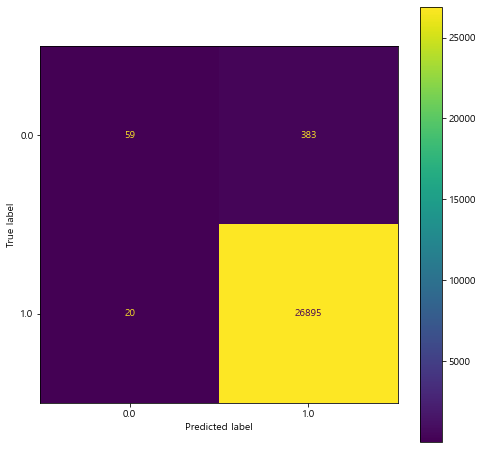

In [132]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix
plt.rcParams['figure.figsize'] = (8,8)
plot_confusion_matrix(lsvc, X, y)
plt.show()

In [142]:
df[model.get_feature_names_out().tolist()]

,단기투자자산(요약),단기대여금(요약),상품(요약),반제품(요약),재공품(요약),*장기금융상품(요약),건물,기타비유동자산(요약),제충당금(요약),매출총이익(요약),...,종업원수,PER(Price earnings ratio)(최고),PER(Price earnings ratio)(최저),PBR(Price book-value ratio)(최고),PBR(Price book-value ratio)(최저),PCR(Price cash-flow ratio)(최고),PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),EBITDA/매출액
0,4552.0,13.0,0.0,0.0,5432.0,854.0,2139.0,599.0,731.0,3580.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,18.0,13.0,0.0,0.0,8774.0,233.0,1171.0,256.0,517.0,876.0,...,120.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,246.0,0.0,0.0,0.0,5569.0,322.0,1116.0,1864.0,216.0,-2672.0,...,68.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,381.0,0.0,0.0,0.0,4627.0,3.0,187.0,1872.0,32.0,121.0,...,23.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.0,0.0,0.0,0.0,904.0,3.0,180.0,806.0,19.0,-1898.0,...,15.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27352,5065.0,0.0,2519.0,0.0,0.0,0.0,2373.0,166.0,239.0,7670.0,...,96.0,28.55,18.25,0.92,0.59,55.71,35.62,0.43,0.28,0.94
27353,5058.0,0.0,2756.0,0.0,0.0,0.0,2229.0,166.0,167.0,7886.0,...,93.0,25.43,18.34,0.77,0.55,33.70,24.31,0.34,0.24,0.74
27354,5.0,0.0,1486.0,0.0,0.0,0.0,2118.0,632.0,0.0,8317.0,...,84.0,28.14,16.65,0.97,0.57,13.22,7.82,0.40,0.24,0.87
27355,11472.0,0.0,2919.0,0.0,0.0,3.0,2068.0,516.0,297.0,7744.0,...,79.0,15.54,4.52,1.72,0.50,176.30,51.31,0.86,0.25,0.67


In [144]:
df_coef.T


,1
자산총계(요약),0.000001
유동자산(요약),-0.000001
당좌자산(요약),0.000002
현금 및 현금성자산(요약),0.000004
단기투자자산(요약),0.000011
...,...
EBITDA,-0.0
EBITDA/매출액,0.000797
EBITDA/금융비용,-0.0
EBITDA/평균발행주식수,0.000003


In [134]:
df_coef = pd.DataFrame([df.columns[:-1], model.estimator_.coef_[0]])
df_coef = df_coef.rename(columns = df_coef.iloc[0])
df_coef = df_coef.drop(df_coef.index[0])
df_coef_new = abs(df_coef[model.get_feature_names_out().tolist()]).T
print(df_coef_new)

                                       1
단기투자자산(요약)                      0.000011
단기대여금(요약)                       0.000014
상품(요약)                          0.000012
반제품(요약)                         0.000069
재공품(요약)                         0.000026
...                                  ...
PCR(Price cash-flow ratio)(최고)  0.000013
PCR(Price cash-flow ratio)(최저)  0.000028
PSR(Price sales ratio)(최고)      0.000248
PSR(Price sales ratio)(최저)      0.005282
EBITDA/매출액                      0.000797

[156 rows x 1 columns]


In [135]:
df_coef_new[1].sort_values(ascending=False)

유동자산회전률                     0.057902
조세공과 대 총비용비율                0.034985
경영자본회전률                     0.027907
타인자본회전률                     0.020028
기업경상이익률 (2007년 이전 발생)       0.013107
                              ...   
적립금비율(재정비율)                 0.000011
*주당경상이익(2007년 이전 발생)(요약)    0.000011
법인세비용차감전(계속사업)손익            0.000011
단기투자자산(요약)                  0.000011
주당순이익(요약)                    0.00001
Name: 1, Length: 156, dtype: object

In [181]:
type(df_coef_new[1])

pandas.core.series.Series

<AxesSubplot:>

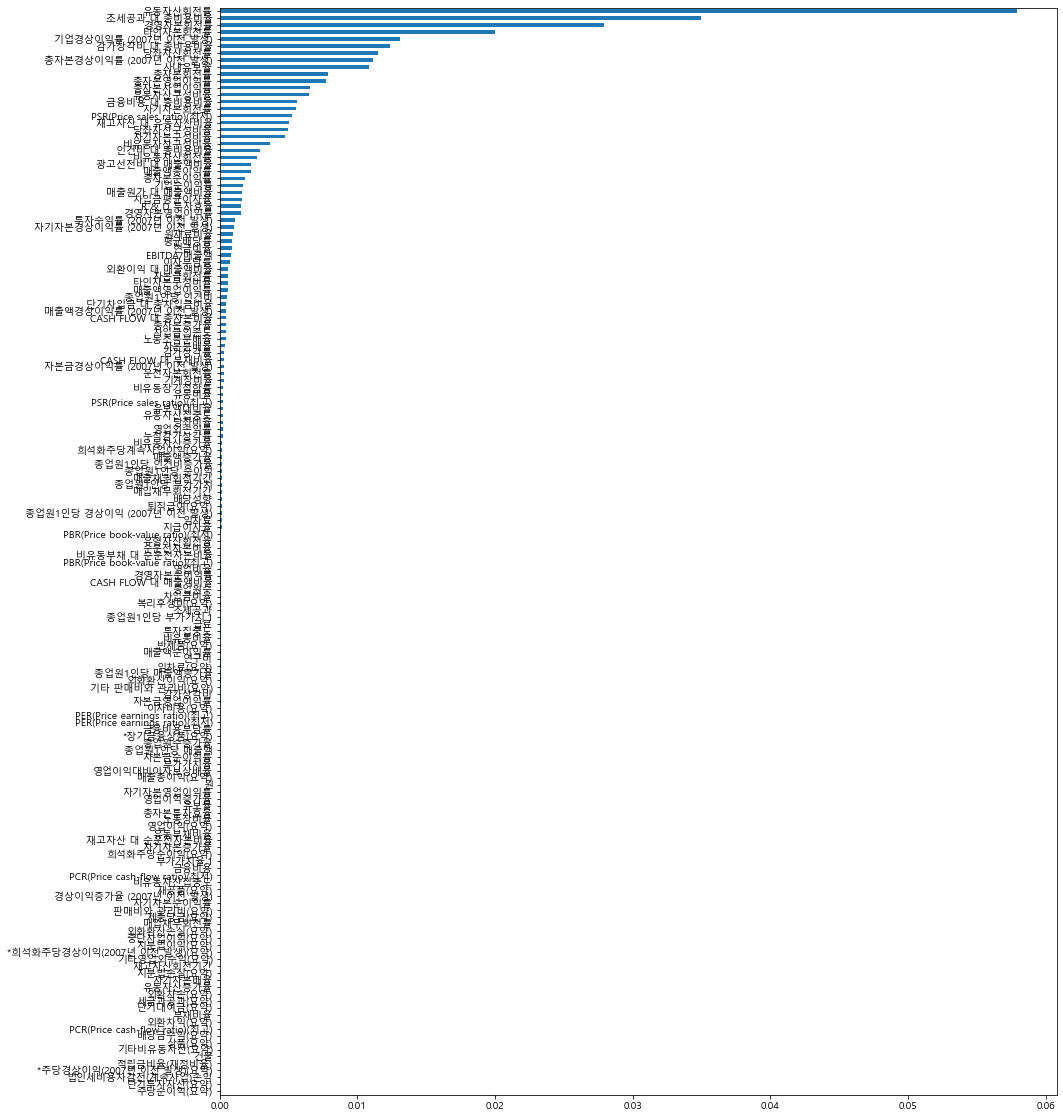

In [139]:
plt.rcParams['figure.figsize'] = (15, 20)
df_coef_new[1].sort_values(ascending=True).plot(kind='barh')


## ANOVA

In [148]:
from sklearn.feature_selection import SelectPercentile, f_classif

In [ ]:
# anova_1 = SelectPercentile(f_classif).fit(X1,y1)
# model_3 = SelectFromModel(anova_1, importance_getter='pvalues_', prefit=False, max_features=20).fit(X1,y1)
# X_new_3 = model_3.transform(X1)
# print(X_new_3.shape)
#W지연이언니코드 복붙ㅋ

In [ ]:
""" 
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=False)
model.fit(X,y)
X_new = model.transform(X)

print(X_new.shape)
print(model.get_feature_names_out())
print("훈련 세트 정확도: {:.3f}".format(lsvc.score(X, y)))
print("f1_score: {:.3f}".format(f1_score(y, lsvc.predict(X), average='macro')))
print("roc_auc_score: {:.3f}".format(roc_auc_score(y, lsvc.predict(X))))
"""

In [267]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import LinearSVC
from sklearn import svm

#anova_filter = SelectKBest(f_classif, k=3)
lsvc = svm.LinearSVC().fit(X,y)
model = SelectFromModel(lsvc, importance_getter='pvalues_', prefit=False)
model.fit(X,y)
X_new = model.transform(X)


AttributeError: 'LinearSVC' object has no attribute 'pvalues_'

In [269]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix
plt.rcParams['figure.figsize'] = (8,8)
plot_confusion_matrix(model, X, y)
plt.show()

ValueError: plot_confusion_matrix only supports classifiers

In [265]:
model.get_feature_names_out().tolist

<function ndarray.tolist>

In [253]:
df_coef_anova = pd.DataFrame([df.columns[:-1], model.estimator_.pvalues_])
df_coef_anova = df_coef_anova.rename(columns = df_coef_anova.iloc[0])
df_coef_anova = df_coef_anova.drop(df_coef_anova.index[0])

In [266]:
df_coef_anova[model.get_feature_names_out().tolist()].T

,1
반제품(요약),0.658491
임대주택자산(요약),0.849517
차량운반구,0.702564
렌탈자산,0.636477
설비자산,0.381391
...,...
PSR(Price sales ratio)(최저),0.934442
EBITDA/매출액,0.984941
EBITDA/금융비용,0.603416
EBITDA/평균발행주식수,0.862713


In [246]:
print(model.estimator_.pvalues_.shape)
model.estimator_.pvalues_

(261,)


array([1.63809964e-004, 5.15475245e-006, 1.07406005e-005, 2.01472142e-010,
       5.39731197e-006, 5.86425510e-008, 1.53650182e-002, 1.74781939e-007,
       4.92964386e-003, 7.92633470e-005, 1.27369780e-001, 1.26125194e-002,
       3.16166973e-003, 1.32231578e-001, 6.39698513e-005, 6.58490823e-001,
       5.20681334e-003, 1.99339985e-001, 9.84787849e-002, 8.49517234e-001,
       6.93209022e-003, 8.67379226e-002, 1.17320100e-003, 8.60316769e-002,
       1.46936469e-002, 2.04023647e-004, 2.86009156e-002, 5.17239569e-003,
       1.86788829e-001, 7.02564015e-001, 6.36476689e-001, 3.81390883e-001,
       1.49767336e-001, 1.53341979e-001, 8.78482348e-001, 1.84310502e-001,
       1.33142439e-003, 3.15330213e-001, 1.15099580e-007, 1.97204505e-003,
       6.83763172e-002, 1.80733546e-001, 4.65305251e-001, 3.79154862e-001,
       3.53201963e-002, 3.17688891e-001, 8.98034123e-001, 1.11711919e-018,
       1.70766630e-001, 2.33482207e-006, 9.51529014e-001, 3.55091279e-001,
       3.22555746e-075, 1

In [249]:
print(clf.coef_.shape)
clf.coef_

(1, 261)


array([[ 2.49233702e-06, -1.21635938e-05, -1.28842980e-06,
         1.90210123e-05,  8.03136515e-07, -4.25629013e-06,
         3.93870952e-05, -4.35947132e-05,  1.06059775e-05,
        -2.23290938e-06, -2.31377515e-05, -1.78752214e-05,
         1.94024677e-06,  1.33325187e-05, -5.49354547e-06,
         1.92178902e-05,  5.37111393e-07, -9.06014170e-06,
        -1.65399042e-05,  5.96622841e-09,  5.58073408e-06,
        -1.31159693e-05,  1.44132858e-04, -4.37108330e-06,
         3.53369875e-05, -4.00726680e-05, -6.80006888e-05,
        -5.09113473e-05, -6.25068871e-05, -6.60932720e-05,
         3.92208584e-04, -6.01218442e-05, -7.18340446e-06,
        -1.79332388e-05, -2.89513372e-24,  8.45860102e-06,
        -4.36718789e-06,  5.98822999e-06, -1.05553569e-05,
        -6.46370958e-06, -1.22434535e-05,  1.52998179e-05,
        -2.69592853e-05, -1.51546307e-05,  5.72510403e-05,
        -9.57303116e-06,  7.27818691e-15,  2.92603372e-06,
         1.69318722e-06, -4.79084076e-06,  1.08738094e-0

In [199]:
coef = anova_svm[:-1].inverse_transform(anova_svm['linearsvc'].coef_)
print(coef)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.16062763e-05 -1.95893968e-04  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000

In [203]:
print(anova_filter.get_feature_names_out())
print("훈련 세트 정확도: {:.3f}".format(anova_svm.score(X, y)))
print("f1_score: {:.3f}".format(f1_score(y, anova_svm.predict(X), average='macro')))
print("roc_auc_score: {:.3f}".format(roc_auc_score(y, anova_svm.predict(X))))

['*미처분이익잉여금 및 차기이월미처분이익잉여금(요약)' '*당기순이익(요약)' '기타영업외비용(요약)'
 '법인세비용차감전(계속사업)손익(요약)' '계속사업이익(요약)' '당기순이익(요약)' '총자본사업이익률' '총자본영업이익률'
 '총자본순이익률' '자기자본영업이익률' '기업순이익률' '경영자본영업이익률' '경영자본순이익률' '자기자본구성비율'
 '타인자본구성비율' '비유동장기적합률' '순운전자본비율' '차입금의존도' '유보액대비율' 'CASH FLOW 대 총자본비율'
 '종업원1인당 부가가치' '종업원1인당 순이익' '총자본투자효율' '법인세비용차감전(계속사업)손익' '종업원1인당 부가가치.1'
 '총자본투자효율.1']
훈련 세트 정확도: 0.947
f1_score: 0.552
roc_auc_score: 0.604


In [204]:
from sklearn.metrics import classification_report

print(classification_report(y, anova_svm.predict(X)))

              precision    recall  f1-score   support

         0.0       0.09      0.25      0.13       442
         1.0       0.99      0.96      0.97     26915

    accuracy                           0.95     27357
   macro avg       0.54      0.60      0.55     27357
weighted avg       0.97      0.95      0.96     27357



In [187]:
train['부도'].value_counts()

1.0    26915
0.0      442
Name: 부도, dtype: int64

In [172]:
anova_svm[-1].coef_[0]

array([ 7.72440135e-05, -2.16463239e-04, -8.66672183e-04,  3.20705202e-05,
       -1.74934460e-04,  1.76494920e-04,  5.76255763e-03,  3.90586235e-04,
       -6.64221741e-03, -1.26938734e-03, -5.33257212e-03,  2.26795159e-03,
       -1.92448665e-03,  1.46003099e-02, -8.54114304e-03, -1.44646668e-03,
       -3.98850982e-03,  7.22586386e-03, -4.16689290e-03,  1.27746855e-02,
        4.89892992e-04, -3.02575509e-04,  1.35551408e-03,  1.03653363e-04,
        4.89892992e-04,  1.35551408e-03])

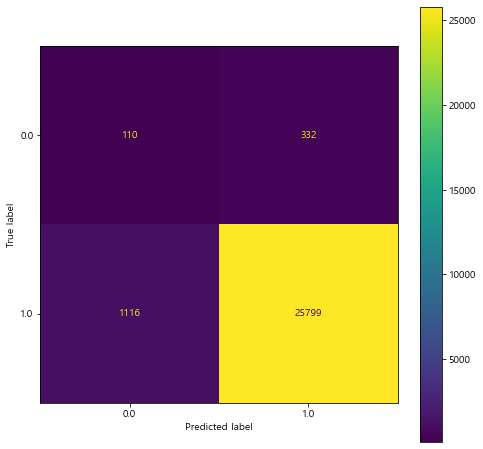

In [205]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix
plt.rcParams['figure.figsize'] = (8,8)
plot_confusion_matrix(anova_svm, X, y)
plt.show()

In [212]:
anova_svm.pvalues_

AttributeError: 'Pipeline' object has no attribute 'pvalues_'

In [ ]:
model_3.estimator_.pvalues_

In [ ]:
cols = np.array(df.columns[:-1])
cef = model.estimator_.coef_[0]

In [ ]:
samples = np.array([cols.tolist(), cef.tolist()]).transpose()


In [ ]:
#왜했지...? 안해도 됨ㅋ
# sample_df = pd.DataFrame(samples)
# sample_df = sample_df.rename(columns={0: '재무변수', 1: 'coef'})
sample_df

In [ ]:
samples = np.array([cols.tolist(), cef.tolist()])

In [ ]:
np.array([cols.tolist(), cef.tolist()]).transpose()

In [ ]:
hi=sample_df.set_index('재무변수')

In [ ]:
hi

In [13]:
model.get_feature_names_out().tolist()

AttributeError: 'SelectFromModel' object has no attribute 'get_feature_names_out'

In [ ]:
df[model.get_feature_names_out().tolist()]

In [ ]:
samples.shape

In [ ]:
#중요변수 상관계수

lasso_df_ = pd.DataFrame(model.estimator_.coef_, columns= [cols.tolist()])
lasso_df_

In [ ]:
#중요변수 81개
model.get_feature_names_out().tolist()

In [ ]:
subset_1 = lasso_df_[model.get_feature_names_out().tolist()]
subset_1

In [ ]:
model.get_feature_names_out().tolist()

In [ ]:
abs(subset_1[0].values).tolist()

In [ ]:
plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['figure.figsize'] = (4, 20)

plt.barh(width= abs(subset_1[0].values).tolist(), y= model.get_feature_names_out().tolist())
plt.show()

In [ ]:
svm_lasso_20 = sorted(abs(subset_1[0]).tolist())[:20]

In [ ]:
svm_lasso_20

In [ ]:
model.get_feature_names_out().tolist()

In [ ]:
subset.shape

### lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y) ->변수20개 0.0 53 

In [ ]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=False, max_features=20)
model.fit(X,y)
X_new = model.transform(X)
print(X_new.shape)
print("훈련 세트 정확도: {:.3f}".format(lsvc.score(X, y)))

In [ ]:
#누락된 공시제목 bankrupt파일에서 강제할당해주었음으로 거래소 코드가 비어있는 기업 삭제해줌
#isna 반대 notna
df = df_full[df_full['회사명_x'].notna()]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix
plt.rcParams['figure.figsize'] = (8,8)
plot_confusion_matrix(lsvc, X, y)
plt.show()

# RF를 이용한 Lasso feature selection

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
forest = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
select_model = SelectFromModel(forest, threshold='median')
select_model.fit(X,y)

# 예측
y_pred = forest.predict(x_test)
print(y_pred)
print(list(y_test))

In [ ]:
randforest = RandomForestClassifier(n_estimators=100, random_state=42).fit(X,y)
select_model = SelectFromModel(randforest, threshold='median')
select_model.fit(X,y)
X_new = model.transform(X)

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(randforest.score(X, y)))

In [ ]:
select_model = SelectFromModel(randforest, threshold='median').fit(X, y)

In [ ]:
importances = randforest.feature_importances_ 

In [ ]:
feat_labels = df_wine.columns[1:]

In [ ]:
indices = np.argsort(importances)[::-1] 
for f in range(X.shape[1]): 
    print("%2d) %-*s %f" % (f + 1, 30, cols[indices[f]], importances[indices[f]])) 

In [ ]:
randforest.fit(X, y) 
importances = randforest.feature_importances_ 
indices = np.argsort(importances)[::-1] 
for f in range(X.shape[1]): print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]])) 

In [ ]:
sfm = SelectFromModel(forest, threshold=0.1, prefit=True) X_selected = sfm.transform(X_train)

출처: https://dnai-deny.tistory.com/14 [ERROR DENY - 공부 디버깅]

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(randforest.score(X, y)))